In [1]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folder = "B:/"
csv_files = glob.glob(os.path.join(folder, "*.csv"))

print(f"📄 Найдено файлов: {len(csv_files)}")

📄 Найдено файлов: 7


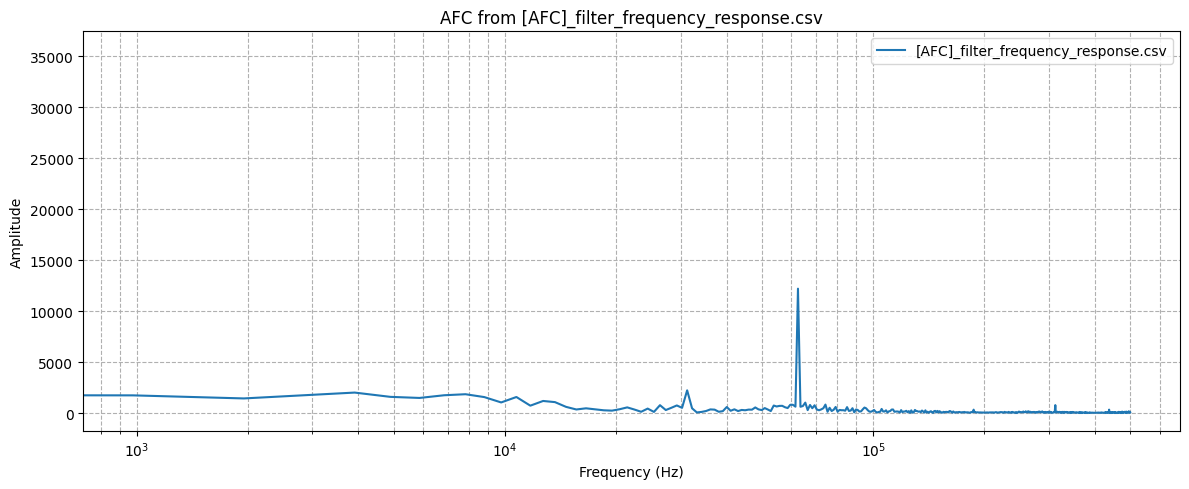

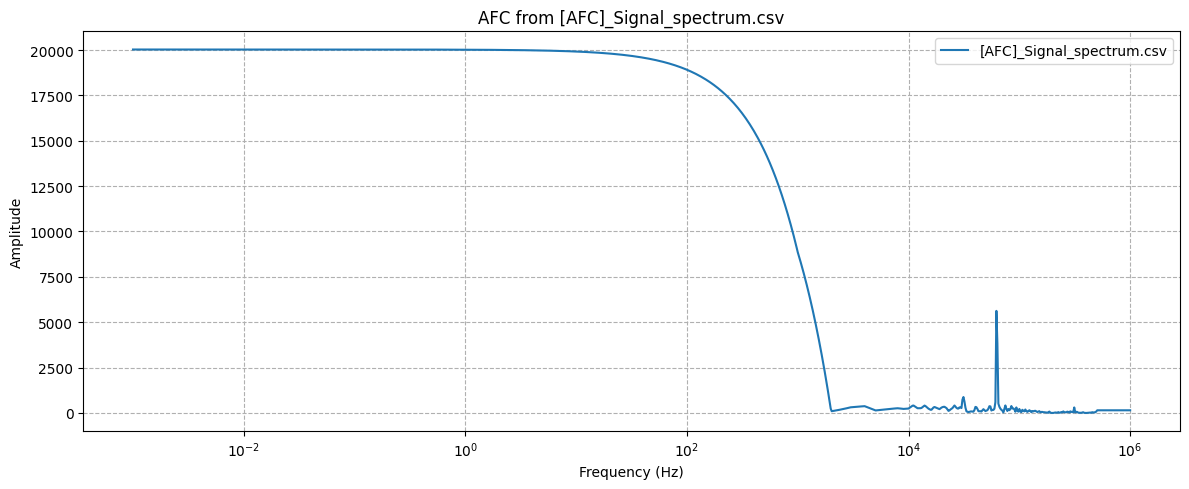

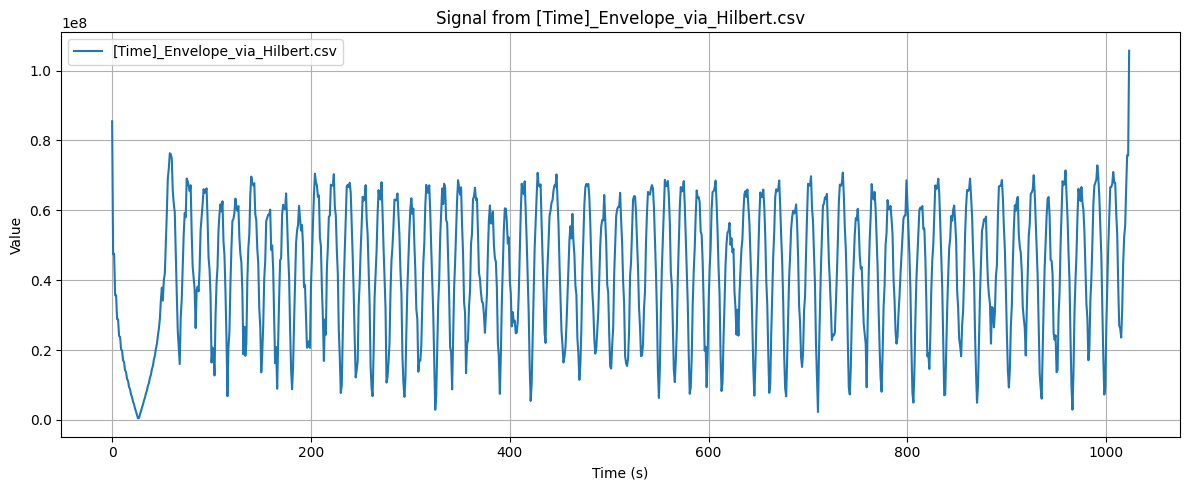

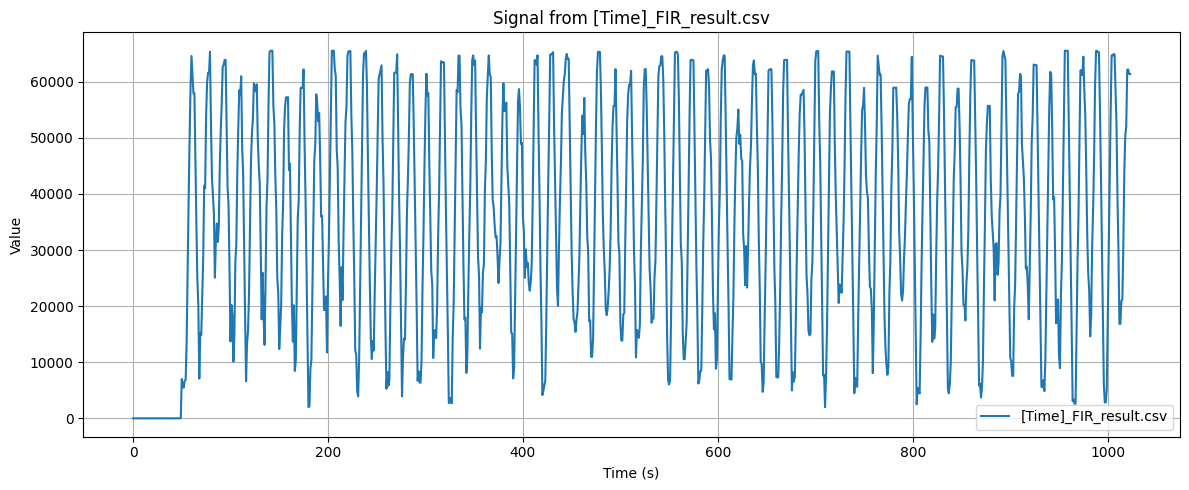

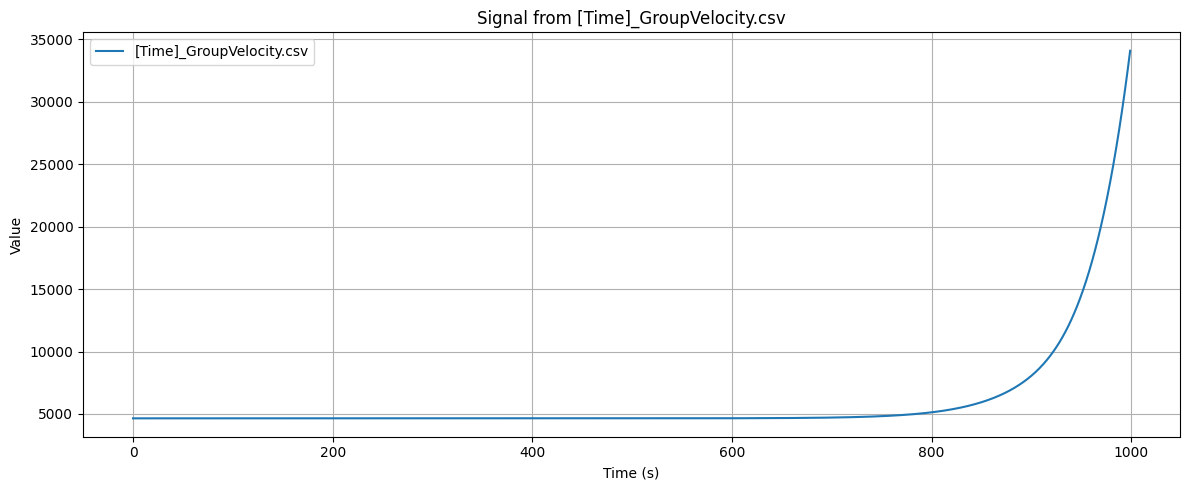

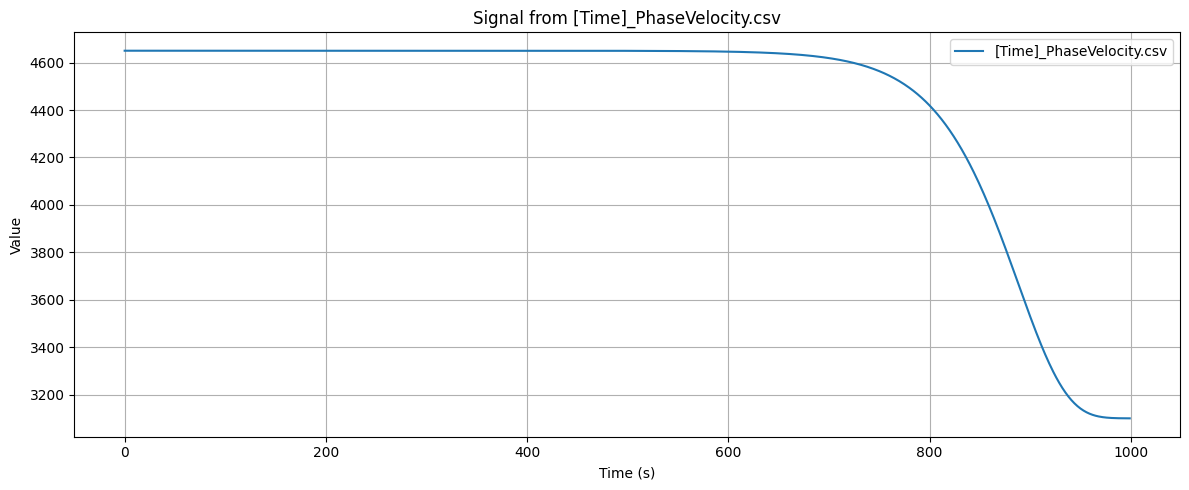

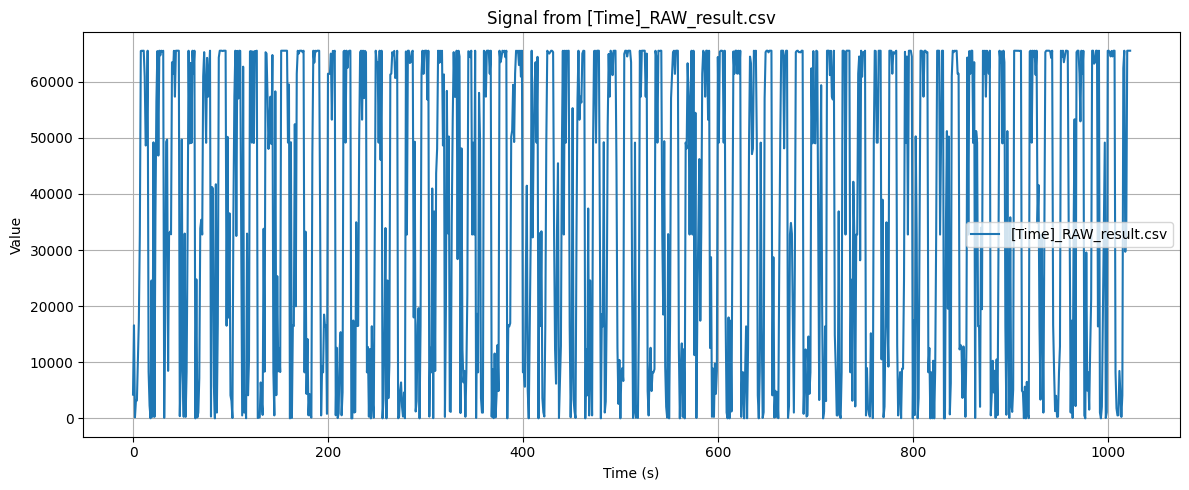

In [3]:
# Параметры
SAMPLE_RATE_HZ = 20_000_000  # Частота дискретизации для временных сигналов

def classify_file(file_name):
    """Определяет тип файла по имени"""
    file_name = file_name.lower()
    if "afc" in file_name:
        return "afc"
    if "time" in file_name:
        return "time"
    return None


def load_and_plot(file_path):
    file_name = os.path.basename(file_path)

    try:
        signal_type = classify_file(file_name)

        if signal_type in ["spectrum", "afc"]:
            # Чтение спектра или АЧХ
            df = pd.read_csv(file_path, header=None, names=["FrequencyHz", "Amplitude"])
            df = df.dropna()

            plt.figure(figsize=(12, 5))
            plt.plot(df["FrequencyHz"], df["Amplitude"], label=file_name)
            plt.xscale("log")  # 🔁 Логарифмическая шкала по оси X
            plt.title(f"{signal_type.upper()} from {file_name}")
            plt.xlabel("Frequency (Hz)")
            plt.ylabel("Amplitude")
            plt.grid(True, which="both", linestyle="--")
            plt.tight_layout()
            plt.legend()
            plt.show()

        else:
            # Временной сигнал
            df = pd.read_csv(file_path, header=None, names=["value"])
            df = df.dropna()

            num_samples = len(df)
            time_seconds = np.arange(num_samples)

            plt.figure(figsize=(12, 5))
            plt.plot(time_seconds, df["value"], label=file_name)
            plt.title(f"Signal from {file_name}")
            plt.xlabel("Time (s)")
            plt.ylabel("Value")
            plt.grid(True)
            plt.tight_layout()
            plt.legend()
            plt.show()

    except Exception as e:
        print(f"❌ Ошибка в файле {file_name}: {e}")


for file in csv_files:
    load_and_plot(file)

In [4]:
for file in csv_files:
    print(f"\n📄 Файл: {os.path.basename(file)}")

    try:
        df = pd.read_csv(file, sep=',', header=None)
        display(df)  # Покажет первые 5 строк как таблицу
    except Exception as e:
        print(f"❌ Ошибка при чтении: {e}")


📄 Файл: [AFC]_filter_frequency_response.csv


,0,1
0,0.0000,35664.731515
1,976.5625,1734.954852
2,1953.1250,1434.219015
3,2929.6875,1767.081928
4,3906.2500,2008.358673
...,...,...
507,495117.1875,51.266881
508,496093.7500,143.622742
509,497070.3125,60.645221
510,498046.8750,98.374493



📄 Файл: [AFC]_Signal_spectrum.csv


,0,1
0,0.001000,20027.767889
1,0.001021,20027.767655
2,0.001042,20027.767416
3,0.001064,20027.767172
4,0.001087,20027.766923
...,...,...
995,920373.199662,147.658945
996,939664.831495,147.658945
997,959360.828709,147.658945
998,979469.667070,147.658945



📄 Файл: [Time]_Envelope_via_Hilbert.csv


,0,1
0,2025-03-03T09:27:02.6950383Z,8.548185e+07
1,2025-03-03T09:27:02.69548442Z,4.739098e+07
2,2025-03-03T09:27:02.69555008Z,4.758045e+07
3,2025-03-03T09:27:02.69557315Z,3.569820e+07
4,2025-03-03T09:27:02.695622Z,3.568959e+07
...,...,...
1019,2025-03-03T09:27:02.77045532Z,5.559865e+07
1020,2025-03-03T09:27:02.77047373Z,6.635788e+07
1021,2025-03-03T09:27:02.77049237Z,7.580819e+07
1022,2025-03-03T09:27:02.77086281Z,7.571569e+07



📄 Файл: [Time]_FIR_result.csv


,0,1
0,2025-03-03T09:27:02.51423816Z,-0.00000
1,2025-03-03T09:27:02.51433866Z,-0.00000
2,2025-03-03T09:27:02.51436592Z,-0.00000
3,2025-03-03T09:27:02.51441524Z,-0.00000
4,2025-03-03T09:27:02.51443982Z,-0.00000
...,...,...
1019,2025-03-03T09:27:02.5587354Z,51994.60074
1020,2025-03-03T09:27:02.55949916Z,62145.60129
1021,2025-03-03T09:27:02.55954746Z,62197.40130
1022,2025-03-03T09:27:02.55957093Z,61378.20125



📄 Файл: [Time]_GroupVelocity.csv


,0,1
0,2025-03-03T09:27:02.93931404Z,4650.00003
1,2025-03-03T09:27:02.93937129Z,4650.00003
2,2025-03-03T09:27:02.93939697Z,4650.00003
3,2025-03-03T09:27:02.93941855Z,4650.00003
4,2025-03-03T09:27:02.9394386Z,4650.00003
...,...,...
995,2025-03-03T09:27:03.02460804Z,31633.16125
996,2025-03-03T09:27:03.02462983Z,32230.94733
997,2025-03-03T09:27:03.02493195Z,32841.30493
998,2025-03-03T09:27:03.02496828Z,33464.49242



📄 Файл: [Time]_PhaseVelocity.csv


,0,1
0,2025-03-03T09:27:02.87330801Z,4649.99998
1,2025-03-03T09:27:02.8733898Z,4649.99998
2,2025-03-03T09:27:02.87396388Z,4649.99998
3,2025-03-03T09:27:02.8740216Z,4649.99998
4,2025-03-03T09:27:02.87404487Z,4649.99998
...,...,...
995,2025-03-03T09:27:02.93883684Z,3100.15603
996,2025-03-03T09:27:02.93885623Z,3100.12865
997,2025-03-03T09:27:02.93887562Z,3100.10565
998,2025-03-03T09:27:02.93889486Z,3100.08641



📄 Файл: [Time]_RAW_result.csv


,0,1
0,2025-03-03T09:27:02.50449313Z,4232.0
1,2025-03-03T09:27:02.50455899Z,16584.0
2,2025-03-03T09:27:02.50458415Z,192.0
3,2025-03-03T09:27:02.50460509Z,3148.0
4,2025-03-03T09:27:02.50462455Z,3172.0
...,...,...
1019,2025-03-03T09:27:02.54971366Z,32767.0
1020,2025-03-03T09:27:02.54973187Z,65535.0
1021,2025-03-03T09:27:02.54974999Z,65535.0
1022,2025-03-03T09:27:02.54976823Z,65535.0
